## Avaliação final - Aprendizado Dinâmico


Profa. **Cibele Russo**

**MBA em Ciências de Dados**

**Atenção: Você deve resolver as questões neste notebook e submetê-lo inteiramente executado no moodle.**


O estado do Amazonas foi fortemente afetado pela pandemia de COVID-19. Os dados de 2021 de casos confirmados e mortes diárias nesse estado estão disponíveis no arquivo covidAM.csv. Nessa avaliação, trabalharemos com os dados **confirmados** (confirmed).

1. Faça a leitura dos dados, estabeleça um índice por datas. Caso haja dados faltantes, complete os dados como indicado. Faça a visualização dos dados com gráfico de linhas e boxplots por semanas. Há evidências de estacionariedade nos gráficos? Por quê?


2. Proponha uma decomposição dos dados confirmados em tendência e sazonalidade. Comente as componentes de tendência, sazonalidade e resíduos. Obtenha os gráficos de autocorrelação e autocorrelação parcial. Esses resultados indicam a presença de autocorrelação? Justifique.


3. Divida a série de registros confirmados em treinamento e teste, com 30 observações na base de teste. A que se referem os dados de treinamento e teste e como essa divisão contribui para a análise de modelos preditivos? 


4. Utilizando a base de treinamento de registros confirmados de COVID-19, obtenha:

    - As previsões de Holt Winters.
    
    - As previsões obtidas pelo melhor modelo SARIMA, com ordens selecionadas segundo critério preestabelecido (auto_arima), para a variável confirmed. Identifique a natureza das componentes desse melhor modelo (por exemplo, “o modelo componentes autorregressiva não sazonal, componente de médias móveis sazonal", etc).
    
    - As previsões com o método Theta usual.
    
    - As previsões com um modelo de redes neurais recorrentes (LSTM ou GRU).    
    
    

5. Utilize o erro absoluto médio para comparar as previsões obtidas com as observações da base de teste. Escolha o método que produz as melhores previsões. Justifique sua resposta. Represente em um mesmo gráfico a base de treinamento, de teste e as previsões obtidas pelos quatro métodos.


#### Boa prova!

## Item 1

1. Faça a leitura dos dados, estabeleça um índice por datas. Caso haja dados faltantes, complete os dados como indicado. Faça a visualização dos dados com gráfico de linhas e boxplots por semanas. Há evidências de estacionariedade nos gráficos? Por quê?



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pkgdir = 'covidAM.csv'

plt.rcParams['figure.figsize'] = [12,6]

# Ignorar warnings não prejudiciais
import warnings
warnings.filterwarnings("ignore")

importando primeiras bibliotecas de funcoes e removendo avisos

In [2]:
df = pd.read_csv(pkgdir, index_col=0, parse_dates=True)

In [3]:
df.isna().sum()

confirmed    0
deaths       0
dtype: int64

garantindo que nao existem dados faltantes.

admitindo o arquivo como um dataframe e permitindo a sua leitura

In [4]:
df.index

DatetimeIndex(['2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
               '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09',
               '2021-01-10', '2021-01-11',
               ...
               '2021-08-22', '2021-08-23', '2021-08-24', '2021-08-25',
               '2021-08-26', '2021-08-27', '2021-08-28', '2021-08-29',
               '2021-08-30', '2021-08-31'],
              dtype='datetime64[ns]', name='date', length=242, freq=None)

identificando a maneira que foram indexados os dados. Frequencia ausente que precisa ser definida

In [5]:
df.index.freq = 'D'
df.index

DatetimeIndex(['2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
               '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09',
               '2021-01-10', '2021-01-11',
               ...
               '2021-08-22', '2021-08-23', '2021-08-24', '2021-08-25',
               '2021-08-26', '2021-08-27', '2021-08-28', '2021-08-29',
               '2021-08-30', '2021-08-31'],
              dtype='datetime64[ns]', name='date', length=242, freq='D')

definindo a frequencia como D, de diaria.

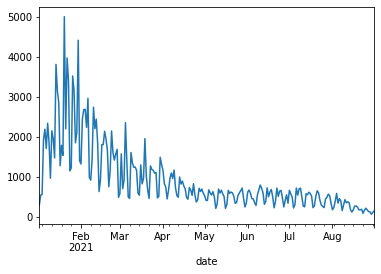

In [6]:
df['confirmed'].plot()

visualizando o grafico de linhas com tempo em dias dos dados classificados como 'confirmed'

In [9]:
import seaborn as sns

In [10]:
df.index.week

Int64Index([53, 53,  1,  1,  1,  1,  1,  1,  1,  2,
            ...
            33, 34, 34, 34, 34, 34, 34, 34, 35, 35],
           dtype='int64', name='date', length=242)

definindo a indexacao como sendo semanal

In [7]:
df['week'] = df.index.week

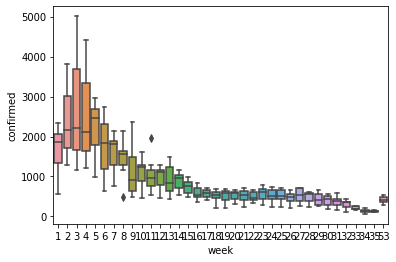

In [11]:
sns.boxplot(x=df['week'], y=df['confirmed'])

visualizando o boxplot dos dados confirmados com indexacao semanal

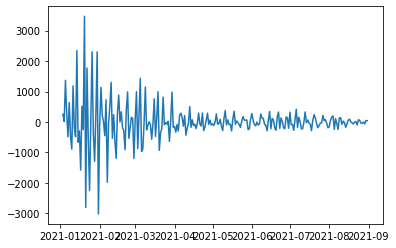

In [11]:
# Primeiras diferenças
y = np.diff(df['confirmed'])
x = df.iloc[1:].index

plt.plot(x,y);

visualizando as primeiras diferencas

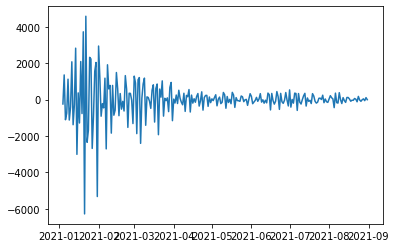

In [12]:
y2 = np.diff(y)
x2 = x[1:]

plt.plot(x2,y2);

visualizando as segundas diferencas

In [13]:
#Neste momento, vamos apenas aplicar o teste de Dickey-Fuller e verificar se há ou não evidências contra a estacionariedade da série.


In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
result = adfuller(df['confirmed'], autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.275691
p-value: 0.179928
Critical Values:
	1%: -3.459
	5%: -2.874
	10%: -2.574


entendendo a estacionariadade da funcao. O valor de p esta pequeno, teste de hipotese de dickey-Fuller rejeitado, indicacao forte de estacionaridade.

In [16]:
result = adfuller(np.diff(df['confirmed']), autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.473549
p-value: 0.000219
Critical Values:
	1%: -3.459
	5%: -2.874
	10%: -2.574


Teste de Dickey-Fuller com valor de p bem pequeno, rejeitada a hipotese de que a série das primeiras diferenças não seria estacionaria. Série é estacionária.

In [17]:
result = adfuller(np.diff(np.diff(df['confirmed'])), autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.409939
p-value: 0.000000
Critical Values:
	1%: -3.460
	5%: -2.875
	10%: -2.574


In [19]:
#Valor de P se aproxima mais de 0,05, série das segundas diferenças com indicações fortes de não ser estacionária. 

**Resposta item 1**




## Item 2

2. Proponha uma decomposição dos dados confirmados em tendência e sazonalidade. Comente as componentes de tendência, sazonalidade e resíduos. Obtenha os gráficos de autocorrelação e autocorrelação parcial. Esses resultados indicam a presença de autocorrelação? Justifique.


A variabilidade ao longo do tempo diminui, então pode se comcluir que o modelo da sazionalidade da série é multiplicativo. Suas flutuações sazonais variam dependentes do nível global da série.

In [20]:
df.head()

,confirmed,deaths,week
date,,,
2021-01-02,293,30,53
2021-01-03,546,20,53
2021-01-04,559,23,1
2021-01-05,1928,46,1
2021-01-06,2192,86,1


In [21]:
df.index

DatetimeIndex(['2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
               '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09',
               '2021-01-10', '2021-01-11',
               ...
               '2021-08-22', '2021-08-23', '2021-08-24', '2021-08-25',
               '2021-08-26', '2021-08-27', '2021-08-28', '2021-08-29',
               '2021-08-30', '2021-08-31'],
              dtype='datetime64[ns]', name='date', length=242, freq='D')

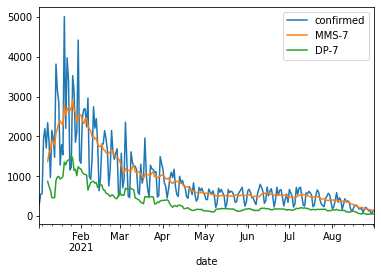

In [22]:
df['MMS-7'] = df['confirmed'].rolling(window=7).mean()
df['DP-7'] = df['confirmed'].rolling(window=7).std()

df[['confirmed','MMS-7','DP-7']].plot();

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
# Decomposição em tendência e sazonalidade

result = seasonal_decompose(df['confirmed'], model='multiplicative')

#period: int, optional
#Period of the series. Must be used if x is not a pandas object or if the index of x does not have a frequency. 
#Overrides default periodicity of x if x is a pandas object with a timeseries index

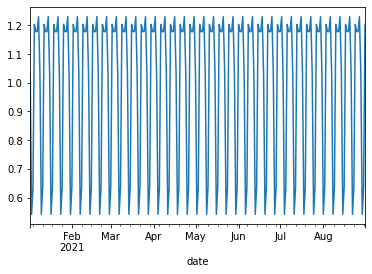

In [24]:
result.seasonal.plot()

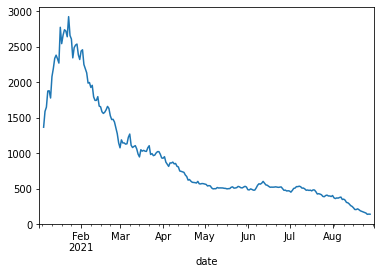

In [25]:
result.trend.plot()

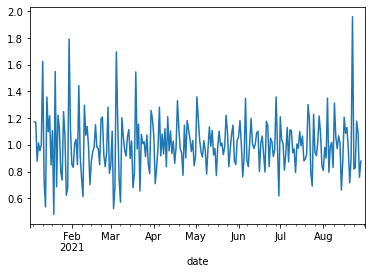

In [26]:
result.resid.plot()

In [27]:
# Funções para cálculo da autocorrelação e autocorrelação parcial
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

In [31]:
df.index

DatetimeIndex(['2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
               '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09',
               '2021-01-10', '2021-01-11',
               ...
               '2021-08-22', '2021-08-23', '2021-08-24', '2021-08-25',
               '2021-08-26', '2021-08-27', '2021-08-28', '2021-08-29',
               '2021-08-30', '2021-08-31'],
              dtype='datetime64[ns]', name='date', length=242, freq='D')

In [32]:
acf(df['confirmed'])

array([1.        , 0.70183285, 0.59248606, 0.61441709, 0.62593187,
       0.57043079, 0.71324361, 0.78721891, 0.68163834, 0.53838365,
       0.55266119, 0.53986085, 0.51599115, 0.56702618, 0.6752178 ,
       0.59668702, 0.45463406, 0.44556108, 0.39603437, 0.41484249,
       0.46848067, 0.56659157, 0.44840075, 0.36004593, 0.33899117,
       0.31378976, 0.30934589, 0.40633803, 0.4360191 , 0.35552221,
       0.26020724, 0.2705536 , 0.23201923, 0.22718195, 0.32572062,
       0.35960711, 0.26751597, 0.19759021, 0.21979078, 0.16768002,
       0.15804371])

In [33]:
pacf(df['confirmed'])

array([ 1.        ,  0.70474502,  0.20018081,  0.2986646 ,  0.21240439,
        0.05322599,  0.48484272,  0.42345764,  0.15632644, -0.17289307,
       -0.1293636 , -0.1363213 , -0.19716456, -0.22679857,  0.05125071,
        0.08380685, -0.08280091, -0.01049683, -0.29590066,  0.02891249,
        0.00618655,  0.21597971, -0.09558221, -0.02320223,  0.14695131,
        0.00742879,  0.09489663,  0.10666207,  0.13685681, -0.02225777,
       -0.13020587, -0.06254927, -0.02728183, -0.0499779 ,  0.09200074,
       -0.03255952, -0.12331451, -0.00846938,  0.04793675,  0.03917598,
       -0.13437118])

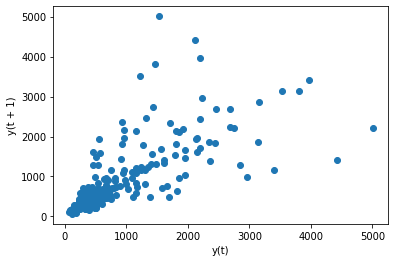

In [34]:
from pandas.plotting import lag_plot
lag_plot(df['confirmed'])

O gráfico acima indica razoável correlação entre a série original e a série com atraso.

In [35]:
 from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


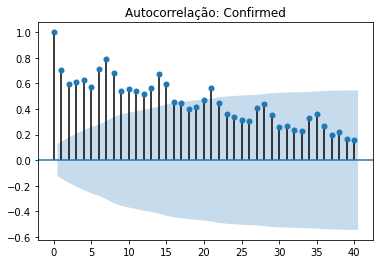

In [40]:
title = 'Autocorrelação: Confirmed'
lags = 40
plot_acf(df['confirmed'],title=title,lags=lags);

O efeito da sazonalidade é observado predominantemente e, portanto, não há estacionariedade no gráfico da autocorrelação.

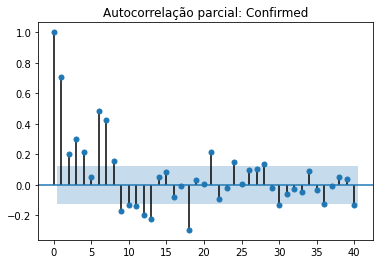

In [41]:
title = 'Autocorrelação parcial: Confirmed'
lags = 40
plot_pacf(df['confirmed'],title=title,lags=lags);

**Resposta item 2**




## Item 3

3. Divida a série de registros confirmados em treinamento e teste, com 30 observações na base de teste. A que se referem os dados de treinamento e teste e como essa divisão contribui para a análise de modelos preditivos? 

O conjunto total de dados representa o espaço amostral completo, todas as possíveis lições. Pegando parte dos dados e separando para testar enquanto a outra parte fica dedicada ao treinamento podemos melhor disponibilizar as opções do espaço amostral e evitar um excessivo ajuste do modelo aos dados, overfitting, garantindo que ainda assim existam lições suficientes para enquadrar um bom treinamento sem o underfitting. A divisão da base em teste e treino garante melhor performance do modelo para o conjunto de dados do que um treinamento único do modelo com todos os dados.

In [6]:
tam_base_teste = 30

In [7]:
len(df) - tam_base_teste

212

In [8]:
df_treino = df.iloc[:(len(df) - tam_base_teste)] # Dados de treinamento 
df_teste = df.iloc[len(df) - tam_base_teste:] # Dados de teste 

In [9]:
df_teste.head()

,confirmed,deaths
date,,
2021-08-02,231,5
2021-08-03,390,9
2021-08-04,587,9
2021-08-05,343,8
2021-08-06,455,8


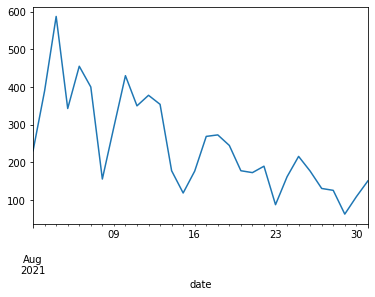

In [17]:
df_teste['confirmed'].plot()

In [18]:
df_treino.head()


,confirmed,deaths,week
date,,,
2021-01-02,293,30,53
2021-01-03,546,20,53
2021-01-04,559,23,1
2021-01-05,1928,46,1
2021-01-06,2192,86,1


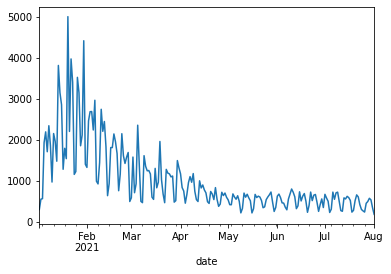

In [19]:
df_treino['confirmed'].plot()

**Resposta item 3**




## Item 4


4. Utilizando a base de treinamento de registros confirmados de COVID-19, obtenha:

    - As previsões de Holt Winters.
    
    - As previsões obtidas pelo melhor modelo SARIMA, com ordens selecionadas segundo critério preestabelecido (auto_arima), para a variável confirmed. Identifique a natureza das componentes desse melhor modelo (por exemplo, “o modelo componentes autorregressiva não sazonal, componente de médias móveis sazonal", etc).
    
    - As previsões com o método Theta usual.
          
    - As previsões com um modelo de redes neurais recorrentes (LSTM ou GRU).    
    
    

In [10]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

ajustado_HW = ExponentialSmoothing(df_treino['confirmed'],trend='multiplicative',seasonal='multiplicative',seasonal_periods=7).fit()
predito_HW = ajustado_HW.forecast(len(df_teste['confirmed'])).rename('Previsão Holt-Winters')

df_teste['Holt-Winters'] = predito_HW

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


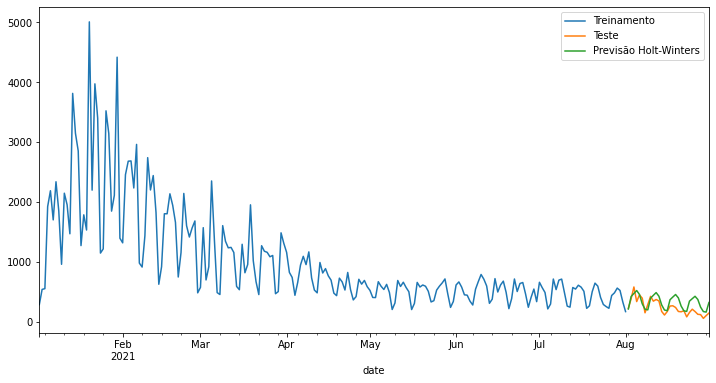

In [11]:
df_treino['confirmed'].plot(legend=True,label='Treinamento',figsize=(12,6))
df_teste['confirmed'].plot(legend=True,label='Teste')
predito_HW.plot(legend=True,label='Previsão Holt-Winters');

In [23]:
pip install pmdarima

     |████████████████████████████████| 1.5 MB 4.1 MB/s 
     |████████████████████████████████| 9.5 MB 39.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose      
from pmdarima import auto_arima 

In [14]:
stepwise_fit = auto_arima(df_treino['confirmed'], start_p=0, start_q=0,
                          max_p=3, max_q=3, m=4,
                          seasonal=True,
                          trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)           

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[4] intercept   : AIC=3352.215, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=3351.221, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=3332.413, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=3272.926, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=3349.223, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=3271.463, Time=0.17 sec
 ARIMA(0,1,1)(1,0,0)[4] intercept   : AIC=3272.684, Time=0.30 sec
 ARIMA(0,1,1)(1,0,1)[4] intercept   : AIC=3271.324, Time=0.61 sec
 ARIMA(0,1,1)(2,0,1)[4] intercept   : AIC=3265.694, Time=0.71 sec
 ARIMA(0,1,1)(2,0,0)[4] intercept   : AIC=3264.907, Time=0.51 sec
 ARIMA(0,1,0)(2,0,0)[4] intercept   : AIC=3351.960, Time=0.08 sec
 ARIMA(1,1,1)(2,0,0)[4] intercept   : AIC=3265.750, Time=0.77 sec
 ARIMA(0,1,2)(2,0,0)[4] intercept   : AIC=3264.135, Time=0.49 sec
 ARIMA(0,1,2)(1,0,0)[4] intercept   : AIC=3269.247, Time=0.47 sec
 ARIMA(0,1,2)(2,0,1)[4] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  212
Model:             SARIMAX(3, 1, 3)x(2, 0, [1], 4)   Log Likelihood               -1599.759
Date:                             Tue, 21 Sep 2021   AIC                           3221.518
Time:                                     06:31:34   BIC                           3258.388
Sample:                                          0   HQIC                          3236.422
                                             - 212                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -47.2429    109.889     -0.430      0.667    -262.621     168.135
ar.L1         -1.2365      0.056    -22.121      0.000      -1.346      -1.127
ar.L2         -1.1685      0.047    -24.801      0.000      -1.261      -1.076
ar.L3         -0.7135      0.048    -14.922      0.000      -0.807      -0.620
ma.L1          0.4415      0.077      5.704      0.000       0.290       0.593
ma.L2          0.0633      0.065      0.977      0.328      -0.064       0.190
ma.L3         -0.2833      0.071     -3.968      0.000      -0.423      -0.143
ar.S.L4       -1.5365      0.062    -24.591      0.000      -1.659      -1.414
ar.S.L8       -0.6688      0.044    -15.319      0.000      -0.754      -0.583
ma.S.L4        0.8712      0.089      9.823      0.000       0.697       1.045
sigma2      2.264e+05   1.41e+04     16.004      0.000    1.99e+05    2.54e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              1529.00
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.02   Skew:                             2.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
modelo = SARIMAX(df_treino['confirmed'], order=(3,1,3), seasonal_order=(2,0,1,4))
resultado = modelo.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                           confirmed   No. Observations:                  212
Model:             SARIMAX(3, 1, 3)x(2, 0, [1], 4)   Log Likelihood               -1604.359
Date:                             Tue, 21 Sep 2021   AIC                           3228.718
Time:                                     14:55:54   BIC                           3262.237
Sample:                                 01-02-2021   HQIC                          3242.267
                                      - 08-01-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2514      0.053    -23.570      0.000      -1.355      -1.147
ar.L2         -1.1410      0.055    -20.931      0.000      -1.248      -1.034
ar.L3         -0.6302      0.075     -8.366      0.000      -0.778      -0.483
ma.L1          0.5059      0.072      7.040      0.000       0.365       0.647
ma.L2          0.0109      0.068      0.160      0.873      -0.123       0.145
ma.L3         -0.4094      0.084     -4.866      0.000      -0.574      -0.245
ar.S.L4       -0.0675      1.052     -0.064      0.949      -2.129       1.993
ar.S.L8        0.3635      0.614      0.592      0.554      -0.841       1.568
ma.S.L4       -0.5278      1.085     -0.486      0.627      -2.654       1.599
sigma2        2.3e+05   1.21e+04     19.053      0.000    2.06e+05    2.54e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1317.85
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.03   Skew:                             1.64
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
# Obtain predicted values
inicio=len(df_treino)
fim=len(df_treino)+len(df_teste)-1
previsões = resultado.predict(start=inicio, end=fim, dynamic=False, typ='levels').rename('Previsões SARIMA')
previsões.index = df_teste.index

In [15]:
df_teste['SARIMA'] = previsões 

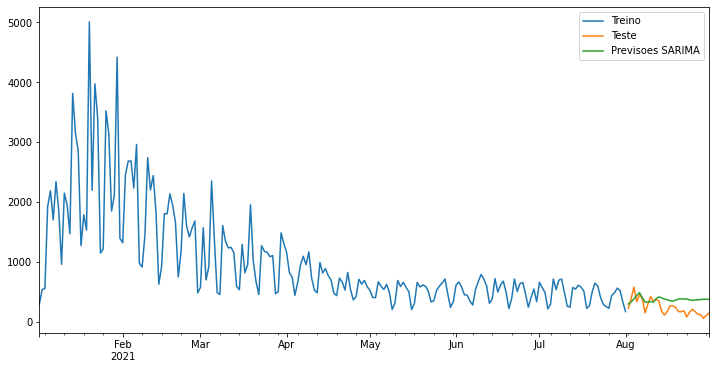

In [16]:
# Plot predictions against known values
title = ''
ylabel=''
xlabel=''

df_treino['confirmed'].plot(legend=True,label='Treino')
ax = df_teste['confirmed'].plot(legend=True,figsize=(12,6),title=title, label='Teste')


previsões.plot(legend=True, label='Previsoes SARIMA')

ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [17]:
from statsmodels.tsa.forecasting.theta import ThetaModel

res = ThetaModel(df_treino['confirmed'], deseasonalize=True, period=7).fit()
fcast = res.forecast(len(df_teste))

df_teste['Theta'] = np.array(fcast)

In [19]:
train = pd.DataFrame(df_treino['confirmed'])
test = pd.DataFrame(df_teste['confirmed'])

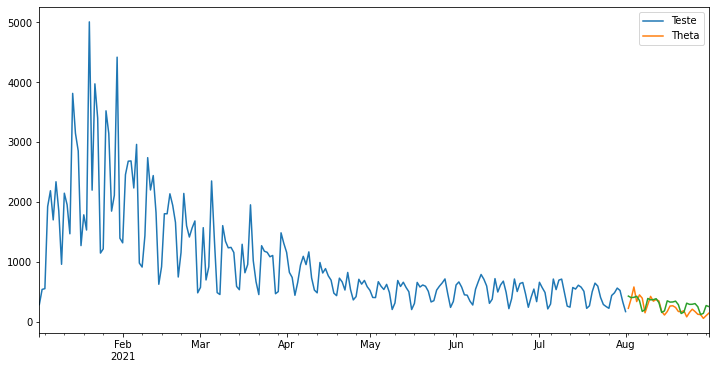

In [20]:
# Plot predictions against known values
title = ''
ylabel=''
xlabel=''

df_treino['confirmed'].plot()
ax = df_teste['confirmed'].plot(legend=True,figsize=(12,6),title=title, label='Teste')

df_teste['Theta'].plot(legend=True)

ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [22]:
scaler.fit(train)
scaled_train = scaler.transform(df_treino)
scaled_test = scaler.transform(df_teste)

In [23]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

n_input = 8
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=2)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

n_features = 1

# Defina o modelo
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [30]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Ajuste do modelo
model.fit_generator(generator,epochs=200)

Epoch 1/200


InvalidArgumentError: ignored

In [27]:




loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)


# Agora vamos considerar as previsões para as próximas 21 observações e comparar com a base de teste
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # obter a previsão de tempo 1 antecipadamente ([0] é para pegar apenas o número em vez de [array])
    current_pred = model.predict(current_batch)[0]
    
    # predição
    test_predictions.append(current_pred) 
    
    # atualize a rodada para agora incluir a previsão e descartar o primeiro valor
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

test_predictions

scaled_test

Epoch 1/200


InvalidArgumentError: ignored

In [ ]:
df_teste['LSTM'] = scaler.inverse_transform(test_predictions)

**Resposta Item 4**


## Item 5


5. Utilize o erro absoluto médio para comparar as previsões obtidas com as observações da base de teste. Qual o método que produz as melhores previsões? Represente em um mesmo gráfico a base de treinamento, de teste e as previsões obtidas pelos quatro métodos.


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
mean_absolute_error(df_teste['confirmed'],df_teste['Holt-Winters'])

In [ ]:
mean_absolute_error(df_teste['confirmed'],df_teste['SARIMA'])

In [ ]:
mean_absolute_error(df_teste['confirmed'],df_teste['Theta'])

In [ ]:
mean_absolute_error(df_teste['confirmed'],df_teste['LSTM'])

In [ ]:
plt.plot(df_treino['confirmed'], label = 'Dados de treinamento')
plt.plot(df_teste['confirmed'], label = 'Dados de teste')
plt.plot(df_teste['Holt-Winters'], label = 'Previsões Holt-Winters')
plt.plot(df_teste['SARIMA'], label = 'Previsões SARIMA')
plt.plot(df_teste['Theta'], label = 'Previsões Theta')
plt.plot(df_teste['LSTM'], label = 'LSTM')
            
plt.title('Standard Theta Model')
plt.legend()
plt.show()

**Resposta Item 5**
